In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 6) # -4 ... 10 
print('SD:', SD)

SD: 0.013107200000000006


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'ABMD', 'ABNB', 'AMZN', 'ANET', 'APPH', 'ATVI', 'AXON', 'AYX', 
    'BILI', 'BYND', 'COUR','CPNG', 'DDOG', 'DOCU', 'DUOL', 'EDIT', 
    'ETSY', 'FSLY', 'FUV', 'GH', 'GMED', 'INTG', 'ISRG', 'JD', 
    'LULU', 'LUV', 'MDB', 'MELI', 'MNST', 'MTCH', 'NVCR', 'OKTA', 
    'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN', 'RGEN', 'ROKU', 'SE', 
    'SHOP', 'SPLK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 
    'TWTR', 'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

54

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = (datetime.now() + timedelta(1)).date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 9, 4))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['ABMD',
 'ABNB',
 'AMZN',
 'ANET',
 'APPH',
 'ATVI',
 'AXON',
 'AYX',
 'BILI',
 'BYND',
 'COUR',
 '^GSPC']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  12 of 12 completed
Generating derived columns...
   ...ABMD
   ...ABNB
   ...AMZN
   ...ANET
   ...APPH
   ...ATVI
   ...AXON
   ...AYX
   ...BILI
   ...BYND
   ...COUR
   ...^GSPC


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 ABMD
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 105.66571044921875
Refitting current best...
Current best ma returns: 163.24189592107047
Fraction Invested: 0.46024340042106204
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 164.16429790635067
Invested: 0.46024340042106204
New best: 164.55551592207786
Invested: 0.4496910245421432
New best: 165.84515953931896
Invested: 0.4496910245421432
New best: 164.71791848275421
Invested: 0.4496910245421432
New best: 159.58907679404794
Invested: 0.4496910245421432
New best: 160.10909171284098
Invested: 0.4496910245421432
New best: 155.01075630227416
Invested: 0.4496910245421432
New best: 155.85735946831704
Invested: 0.4496910245421432
New best: 154.51871968885587
Invested: 0.

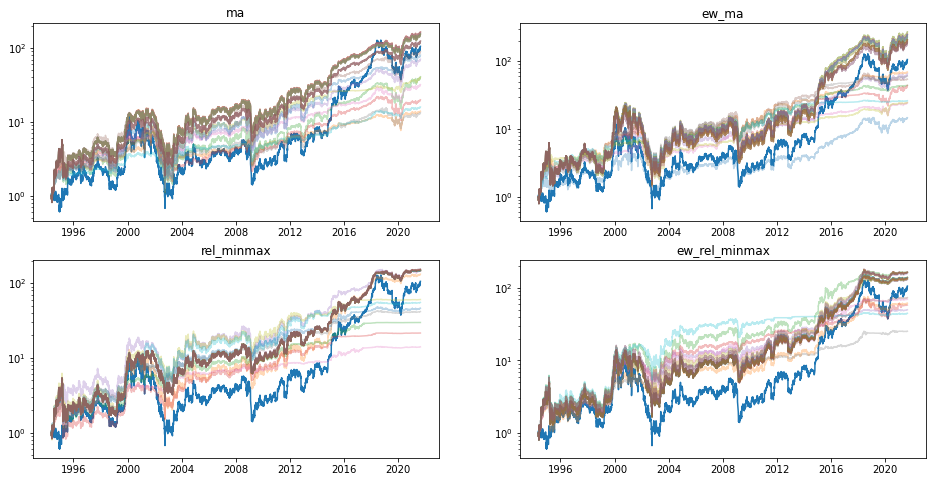

Saving ABMD params...



----------------------------------------------------------------------
                                 ABNB
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 0.8464354722969835
Refitting current best...
Current best ma returns: 0.8852701549015656
Fraction Invested: 0.28360149474695934
Beginning random search...
New best: 0.9917023875544836
Invested: 0.19827674902003334
New best: 0.8941176387906402
Invested: 0.35401924730257506
New best: 0.9496783233339539
Invested: 0.17689989086939018
New best: 0.9355646627923258
Invested: 0.2761383010627997
New best: 0.883536824439965
Invested: 0.4598628863426998
New best: 0.8642987208858092
Invested: 0.5729803167583032
New best: 0.910594801091263
Invested: 0.2323185530076769
New best: 0.9565965308598002
Invested: 0.1221156372463107
New best: 0.9379113861421063
Invested: 0.2197807358171684


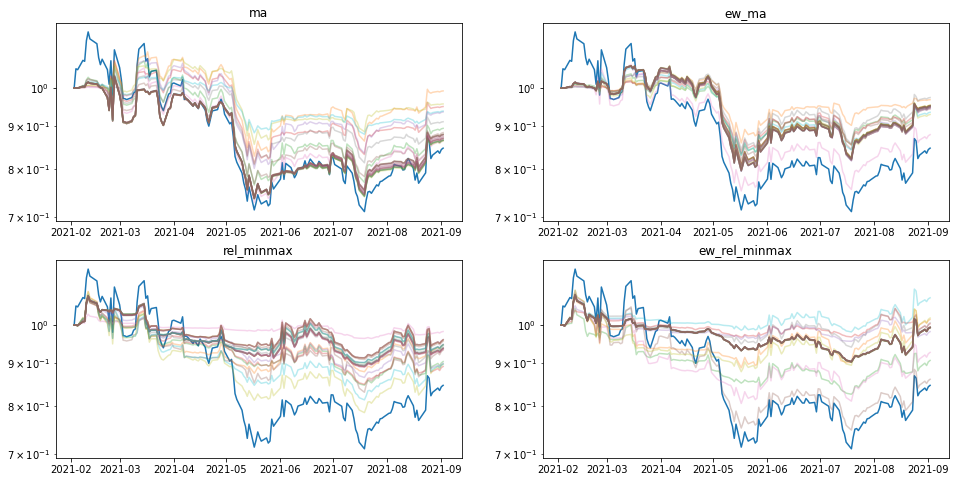

Saving ABNB params...



----------------------------------------------------------------------
                                 AMZN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 242.17622874098254
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 242.17622874098254
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 242.17622874098254
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_rel_minmax method...
-------------

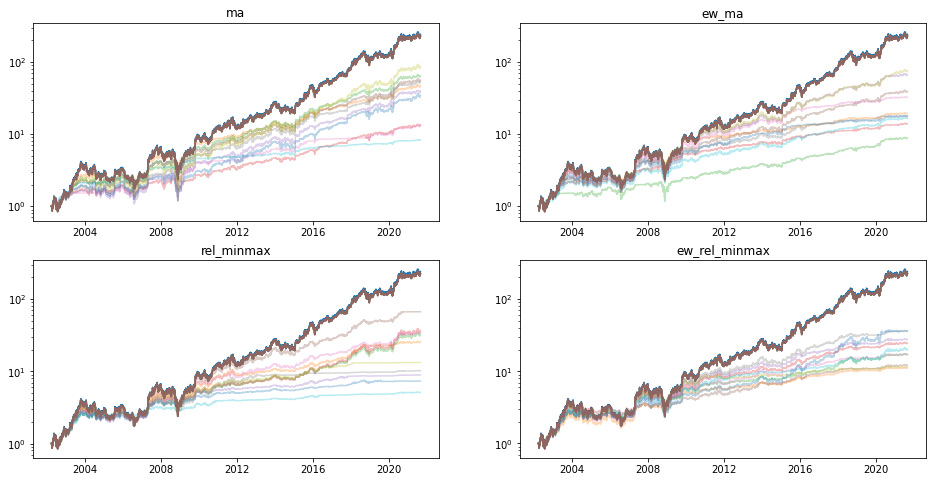

Saving AMZN params...



----------------------------------------------------------------------
                                 ANET
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 5.3610786444718865
Refitting current best...
Current best ma returns: 5.481424621094305
Fraction Invested: 0.9975349566149151
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 5.481243387085293
Invested: 0.9974595151718446
New best: 5.46804533611118
Invested: 0.9974595151718446
New best: 5.468125068214848
Invested: 0.9974595151718446
New best: 5.4681155811969395
Invested: 0.9974595151718446
New best: 5.468110381783859
Invested: 0.9974595151718446
New best: 5.468316685228478
Invested: 0.9974595151718446
New best: 5.467290759534374
Invested: 0.9978879908399302
New best: 5.481493566250966
Invested: 0.9978879908399302
New best: 5.49922133684265
Inv

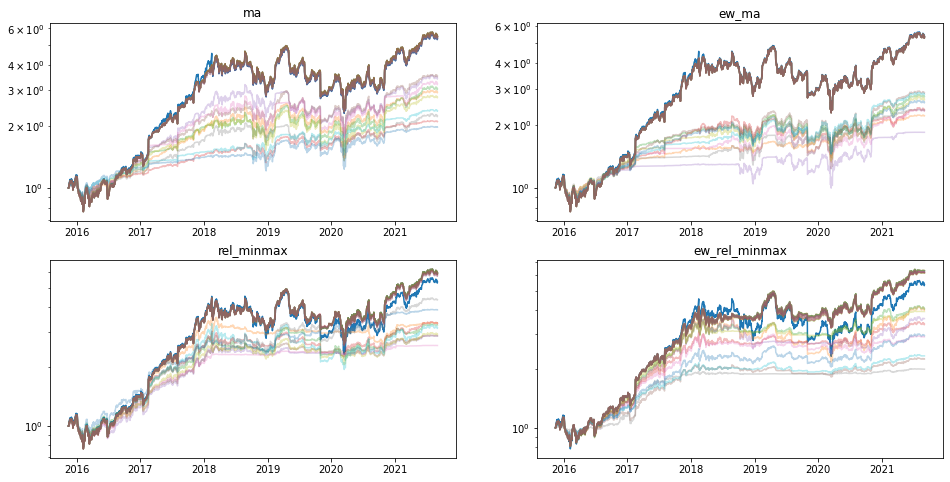

Saving ANET params...



----------------------------------------------------------------------
                                 APPH
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 0.8257804186562893
Refitting current best...
Current best ma returns: 0.9543325774654684
Fraction Invested: 0.5683275189299498
Beginning random search...
New best: 0.9554952068998668
Invested: 0.5494192928544503

Beginning adjusted search...
New best: 0.9688194769440256
Invested: 0.5494192928544503
New best: 0.9655904963219302
Invested: 0.5494192928544503
New best: 0.968270628228197
Invested: 0.5494192928544503
New best: 0.9684578289208536
Invested: 0.5494192928544503
New best: 0.9666770831632079
Invested: 0.5494192928544503
New best: 0.9724075054330814
Invested: 0.5494192928544503
New best: 0.9724075054330814
Invested: 0.5494192928544503
New best: 0.9724075054330814
In

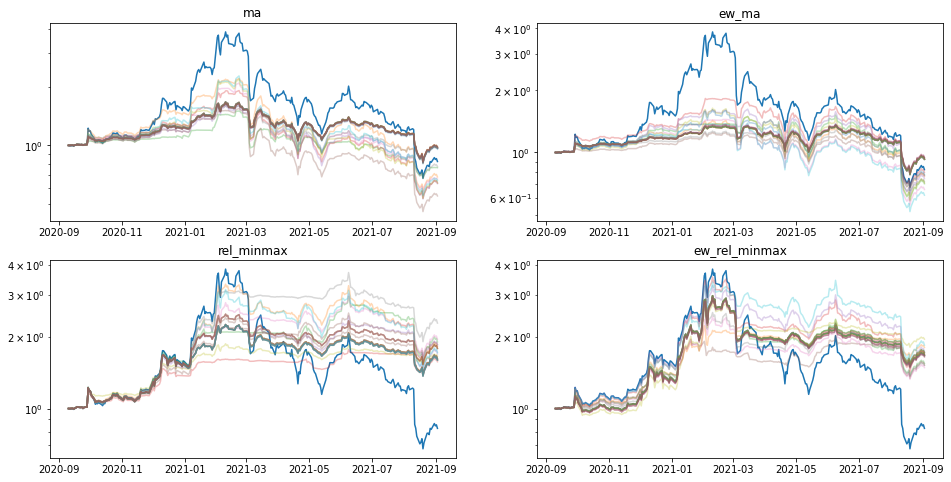

Saving APPH params...



----------------------------------------------------------------------
                                 ATVI
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 84.56414547715494
Refitting current best...
Current best ma returns: 103.6124801569368
Fraction Invested: 0.9928300987461175
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 103.6124801569368
Invested: 0.9928300987461175
New best: 103.6067447521849
Invested: 0.9928300987461175
New best: 103.1969072512411
Invested: 0.9928300987461175
New best: 102.99763706544935
Invested: 0.9928300987461175
New best: 103.38542133212763
Invested: 0.9928300987461175
New best: 103.3863362890331
Invested: 0.9928300987461175
New best: 103.3863362890331
Invested: 0.9928300987461175
New best: 103.59084450560786
Invested: 0.9928300987461175
New best: 103.0474530548685


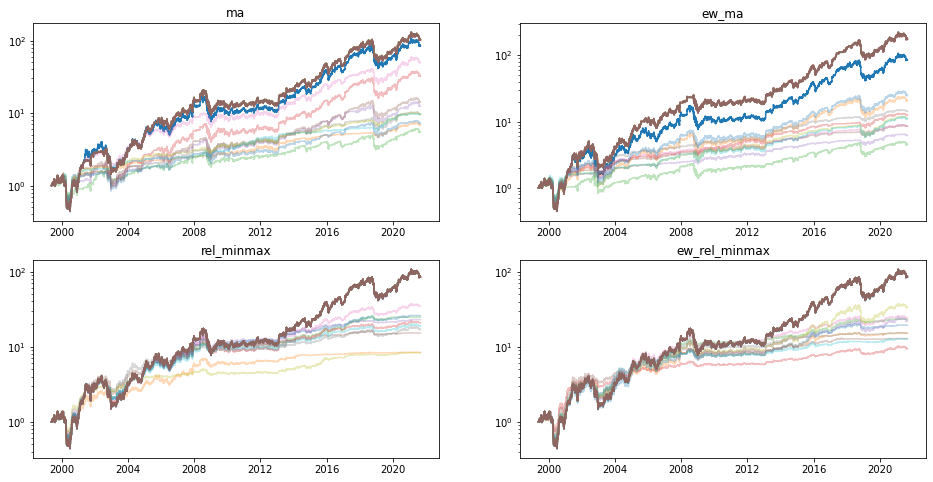

Saving ATVI params...



----------------------------------------------------------------------
                                 AXON
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 17.928431229094546
Refitting current best...
Current best ma returns: 19.163947011958264
Fraction Invested: 0.884110208294984
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 19.15962416182092
Invested: 0.884110208294984
New best: 18.542122875164416
Invested: 0.884110208294984
New best: 18.542122875164416
Invested: 0.884110208294984
New best: 18.59969637230519
Invested: 0.884110208294984
New best: 18.59969637230519
Invested: 0.884110208294984
New best: 18.68793892036204
Invested: 0.884110208294984
New best: 18.68846652858987
Invested: 0.884110208294984
New best: 18.679823469290884
Invested: 0.884110208294984
New best: 18.60372724434096
Investe

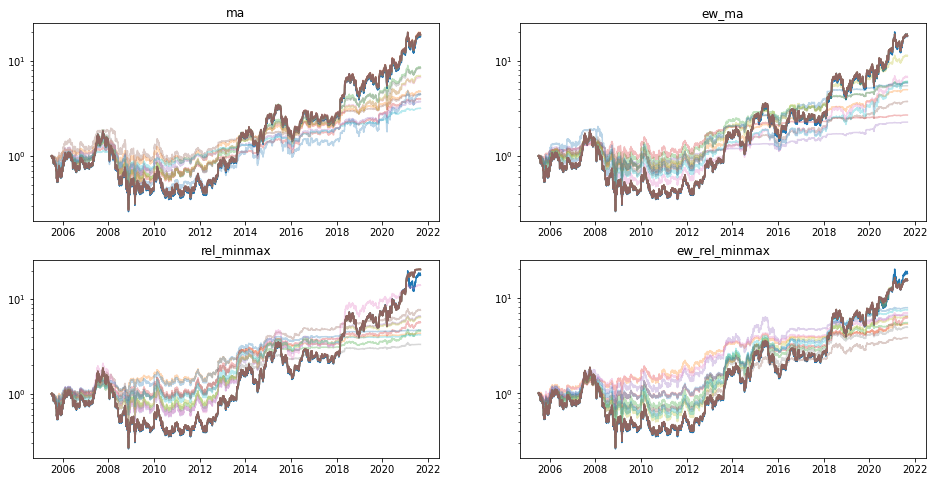

Saving AXON params...



----------------------------------------------------------------------
                                 AYX
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 2.8402121381905507
Refitting current best...
Current best ma returns: 2.9798312430729075
Fraction Invested: 0.9473972068683443
Beginning random search...
New best: 3.0105092838418006
Invested: 0.9698875420995156
Round: 10
Beginning adjusted search...
New best: 3.01244725379218
Invested: 0.9698875420995156
New best: 3.01244725379218
Invested: 0.9698875420995156
New best: 3.01244725379218
Invested: 0.9698875420995156
New best: 3.01244725379218
Invested: 0.9698875420995156
New best: 3.0003101613380148
Invested: 0.9698875420995156
New best: 3.0029274426602584
Invested: 0.9698875420995156
New best: 3.0033509109268364
Invested: 0.9698875420995156
New best: 3.017446192981524
In

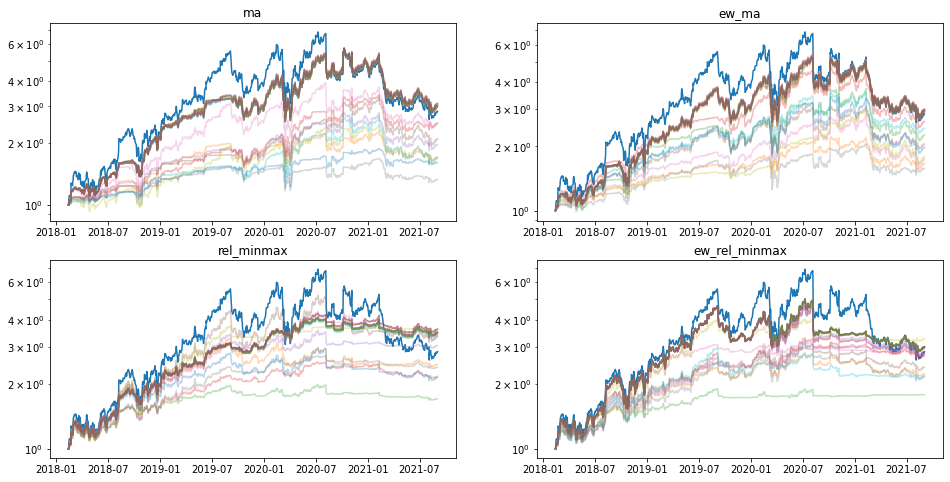

Saving AYX params...



----------------------------------------------------------------------
                                 BILI
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 5.429961280328173
Refitting current best...
Current best ma returns: 6.199136440552184
Fraction Invested: 0.9999728258139851
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 6.188479369868098
Invested: 0.9999728258139851
New best: 6.188478980671663
Invested: 0.9999728258139851
New best: 6.178772958710998
Invested: 0.9999728258139851
New best: 6.17922225711258
Invested: 0.9999728258139851
New best: 6.179450505309731
Invested: 0.9999728258139851
New best: 6.184043006886208
Invested: 0.9999728258139851
New best: 6.184082479207189
Invested: 0.9999728258139851
New best: 6.184082479207189
Invested: 0.9999728258139851
New best: 6.184082479207189
Inves

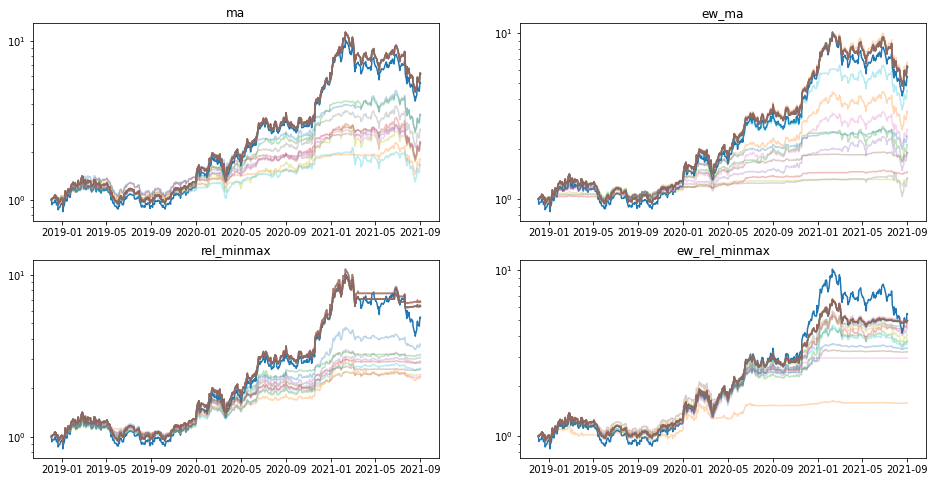

Saving BILI params...



----------------------------------------------------------------------
                                 BYND
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.0886444239418576
Refitting current best...
Current best ma returns: 1.094261822079526
Fraction Invested: 0.7975739547524466
Beginning random search...
New best: 1.5041075682580156
Invested: 0.6931597726912923
New best: 1.5796338507004142
Invested: 0.8370859011939228
New best: 1.6793474718809862
Invested: 0.6609060064397144
New best: 1.636556049593385
Invested: 0.511261853357482
New best: 1.5838488658757846
Invested: 0.6695145378745708

Beginning adjusted search...
New best: 1.5852940372819722
Invested: 0.6695145378745708
New best: 1.581875373525767
Invested: 0.6695145378745708
New best: 1.5805956236711372
Invested: 0.6695145378745708
New best: 1.5878524066131465
Inves

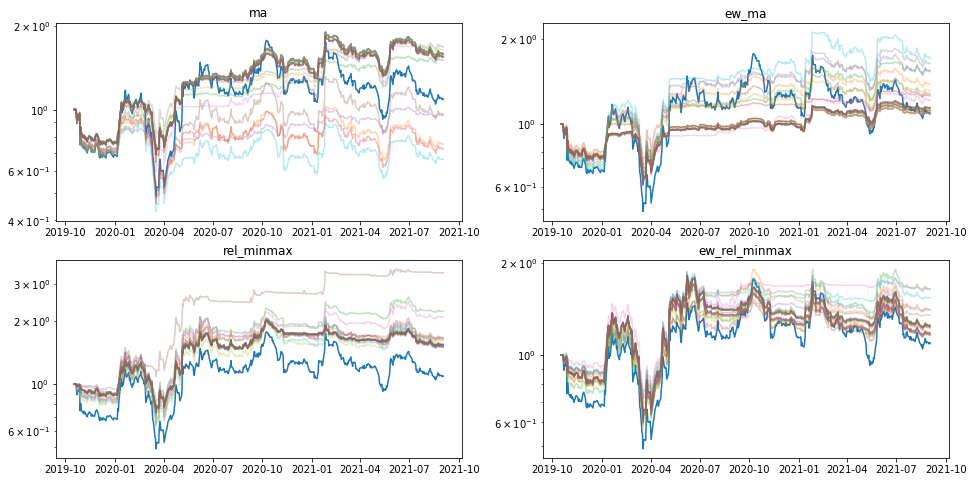

Saving BYND params...



----------------------------------------------------------------------
                                 COUR
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 0.879194598798396
Refitting current best...
Current best ma returns: 0.9728334712431883
Fraction Invested: 0.13283553814421684
Beginning random search...
New best: 0.9288293760303247
Invested: 0.1997585024649221
New best: 1.055441828304101
Invested: 0.06832320495551092
New best: 1.0594651230436931
Invested: 0.037640890258772264
New best: 1.0053053913934975
Invested: 0.057801538015014975
New best: 0.9670506242675541
Invested: 0.031013015437603042
New best: 0.9435275674479434
Invested: 0.28762046199841385
New best: 1.1032087942256479
Invested: 0.07071447802070119
New best: 0.9748563774693644
Invested: 0.26692035879787046
New best: 0.9591883866030284
Invested: 0.1789691082

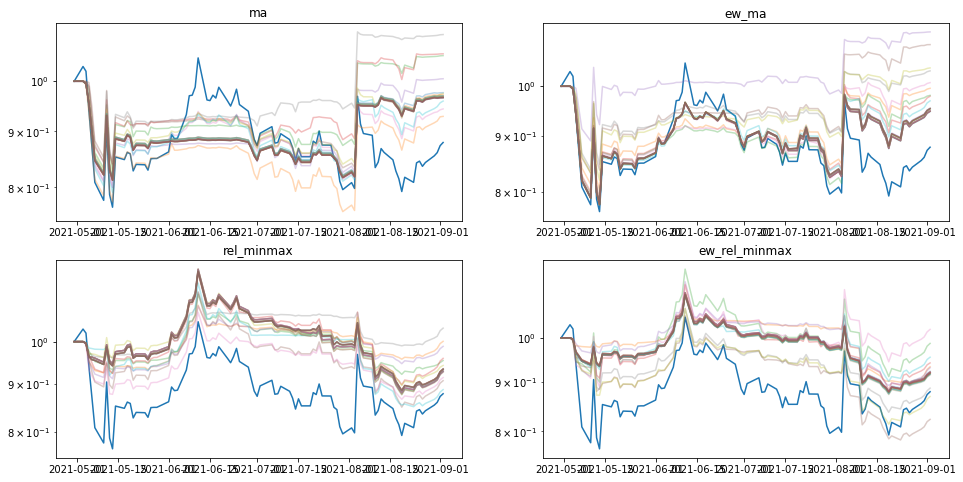

Saving COUR params...



----------------------------------------------------------------------
                                 ^GSPC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 15.968429794746404
Refitting current best...
Current best ma returns: 16.006925212223592
Fraction Invested: 0.9686847769104423
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 16.00360713970864
Invested: 0.9686847769104423
New best: 16.00249872644713
Invested: 0.9686847769104423
New best: 16.00522039491156
Invested: 0.9686847769104423
New best: 16.027558471236624
Invested: 0.9686847769104423
New best: 16.027931432457002
Invested: 0.9686847769104423
New best: 16.02142804600736
Invested: 0.9686847769104423
New best: 16.045745459323136
Invested: 0.9686847769104423
New best: 16.034316132126293
Invested: 0.9686847769104423
New best: 16.03361358109

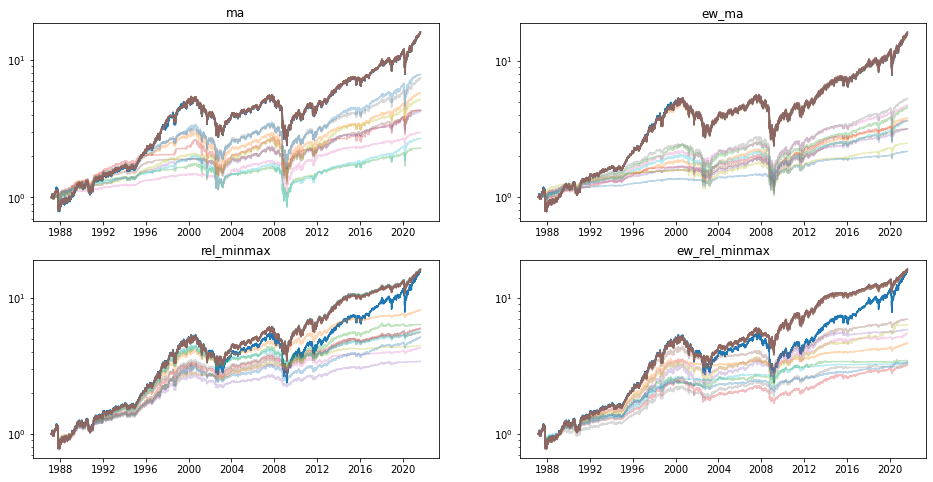

Saving ^GSPC params...


In [14]:
N_RAND = 10
N_ADJ = 15

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    try:
        best_params, best_returns = read_best_params(stock)
        stock_data = get_stock_data(stock, data)
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
        qp = QPercent(stock_data, 
                      N_CUTS, 
                      best_param_set=best_params, 
                      best_returns=best_returns, 
                      sd=SD)
        qp.run_sims(N_RAND, N_ADJ)
        best = get_best_param_set(qp)
        save_best_param_set(best, stock)
    except BaseException as e:
        print(f'Error encountered\n{e}')

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


ABMD:
  Best Return: 190.62711520079117 (ew_ma)
  73.86% in

ABNB:
  Best Return: 0.9936294002684276 (ew_rel_minmax)
  75.77% in

AMZN:
  Best Return: 242.17622874098254 (ma)
  100.00% in

ANET:
  Best Return: 6.1576575675879415 (ew_rel_minmax)
  16.23% in

APPH:
  Best Return: 1.7825202029275427 (rel_minmax)
  78.20% in

ATVI:
  Best Return: 178.01191584717105 (ew_ma)
  99.89% in

AXON:
  Best Return: 20.716974765199147 (rel_minmax)
  4.23% in

AYX:
  Best Return: 3.61346559761625 (rel_minmax)
  66.32% in

BILI:
  Best Return: 6.403397557340622 (rel_minmax)
  88.18% in

BYND:
  Best Return: 1.545735497120062 (ma)
  66.95% in

COUR:
  Best Return: 0.9663475000238254 (ma)
  3.64% in

^GSPC:
  Best Return: 16.40660884023542 (ew_rel_minmax)
  42.91% in


In [17]:
!say qp is dunzo

IXIC: Nasdaq